In [1]:
import os
import requests
import pandas as pd
import json
from datetime import datetime, timedelta
import time
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import numpy as np

# EDA Part 2

Let's explore possible temporal features that may be helpful in predicting bot or not

## Loading data

In [2]:
path = r'../endlessdice-201903' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    df = pd.read_json(filename,lines=True)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True,sort=True)

In [3]:
def strpDateTime(data):
    return data['trx_timestamp'].apply(lambda x : datetime.strptime(x[:10]+x[11:19],"%Y-%m-%d%H:%M:%S"))
def dropCols(data):
    #d_memo and maybe block_num may have some relevance later on
    return data.drop(['account_action_seq','block_num','d_memo','authorization','global_action_seq','data','name','trx_id','trx_timestamp_unix'],axis=1)
def applyLabels(data):
    list_bots=['edgarwinston','Griffinhamza','jacksonjimmy','1ffyqhg4rmbk','1ffyqhg4rmbk','powellernest','2rezoaf4bhly','nckj42dit5sb','scottphillip','oepa252sdx4p','myh2o4wayvxg']
    list_humans=['g44dinjygene','onebrother11','rvrkingfishr','iloveyoudapp','huiyong12345','pketothemoon','zhshj1212123','vipgamedice2','dldldldldldl','pkeniubixxxx']
    data['bot_label']=data['d_from'].apply(lambda x: 1 if x in list_bots else (0 if x in list_humans else None))
def dataProcess(data):
    data['trx_timestamp']=strpDateTime(data)
    data['hours']=[i.hour for i in data['trx_timestamp']]
    data['minutes']=[i.minute for i in data['trx_timestamp']]
    data['seconds']=[i.second for i in data['trx_timestamp']]
    data['day']=[i.day for i in data['trx_timestamp']]
    applyLabels(data)
    return dropCols(data)

## Exploring Labeled Bots 

Focusing on labeled bots to understand temporal nature of transactions that could lead them to being classfied as bots. First let's look at the three labeled bots provided to us

In [9]:
first_bot=clean_frame[clean_frame['d_from']=='edgarwinston']
first_bot['timedelta']=timedelta(first_bot)
second_bot=clean_frame[clean_frame['d_from']=='1ffyqhg4rmbk']
second_bot['timedelta']=timedelta(second_bot)
third_bot=clean_frame[clean_frame['d_from']=='nckj42dit5sb']
third_bot['timedelta']=timedelta(third_bot)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

### First Labeled Bot

In [10]:
first_bot.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,3.100000e+01,31.0,31.0,31.000000,31.000000,31.0,30.000000
mean,1.000000e-01,0.0,0.0,5.225806,16.000000,1.0,20160.033333
std,4.232156e-17,0.0,0.0,0.497305,9.092121,0.0,37167.237193
min,1.000000e-01,0.0,0.0,4.000000,1.000000,1.0,0.000000
25%,1.000000e-01,0.0,0.0,5.000000,8.500000,1.0,0.000000
50%,1.000000e-01,0.0,0.0,5.000000,16.000000,1.0,0.000000
75%,1.000000e-01,0.0,0.0,5.500000,23.500000,1.0,1.750000
max,1.000000e-01,0.0,0.0,6.000000,31.000000,1.0,86399.000000


 #### You can see hours and minutes dont change

In [11]:
first_bot

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
1275739,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-01 00:00:05,0,0,5,1,1.0,NaN
2644679,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-02 00:00:04,0,0,4,2,1.0,86399.0
2540106,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-03 00:00:06,0,0,6,3,1.0,2.0
4376621,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-04 00:00:05,0,0,5,4,1.0,86399.0
3636321,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-05 00:00:06,0,0,6,5,1.0,1.0
945026,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-06 00:00:05,0,0,5,6,1.0,86399.0
3,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-07 00:00:06,0,0,6,7,1.0,1.0
4066156,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 00:00:05,0,0,5,8,1.0,86399.0
3968689,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-09 00:00:05,0,0,5,9,1.0,0.0
848842,eosio.token,edgarwinston,0.1,EOS,endlessdicex,Endless Dice,2019-03-10 00:00:05,0,0,5,10,1.0,0.0


In [13]:
first_bot['timedelta'].value_counts()

0.0        16
86399.0     7
1.0         6
2.0         1
Name: timedelta, dtype: int64

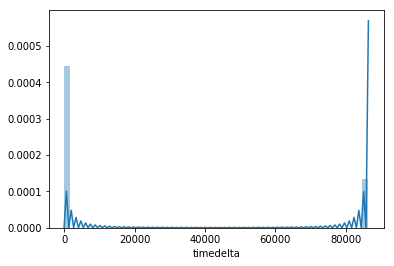

In [14]:
sns.distplot(first_bot['timedelta'].iloc[1:])

Timedelta between transactions seems to be very important for classification as a bot. Lets see if other labeled bots confirm  this.

In [15]:
second_bot.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.0,31.00000
mean,1.000000e-01,0.125000,33.156250,27.500000,16.468750,1.0,33900.83871
std,4.229954e-17,0.707107,1.139025,11.559105,9.329054,0.0,42457.12307
min,1.000000e-01,0.000000,28.000000,7.000000,1.000000,1.0,1.00000
25%,1.000000e-01,0.000000,33.000000,18.750000,8.750000,1.0,5.50000
50%,1.000000e-01,0.000000,33.000000,28.000000,16.500000,1.0,74.00000
75%,1.000000e-01,0.000000,33.000000,36.000000,24.250000,1.0,86367.00000
max,1.000000e-01,4.000000,35.000000,56.000000,31.000000,1.0,86398.00000


In [16]:
second_bot

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
1279843,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-01 00:33:18,0,33,18,1,1.0,NaN
2648787,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-02 00:33:21,0,33,21,2,1.0,3.0
2544010,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-03 00:33:26,0,33,26,3,1.0,5.0
4380620,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-04 00:33:39,0,33,39,4,1.0,13.0
3639593,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-05 00:33:29,0,33,29,5,1.0,86390.0
948150,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-06 00:33:31,0,33,31,6,1.0,2.0
4093,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-07 00:33:36,0,33,36,7,1.0,5.0
4070208,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 00:33:33,0,33,33,8,1.0,86397.0
3972880,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-09 00:33:19,0,33,19,9,1.0,86386.0
852788,eosio.token,1ffyqhg4rmbk,0.1,EOS,endlessdicex,Endless Dice,2019-03-10 00:33:28,0,33,28,10,1.0,9.0


In [17]:
second_bot['timedelta'].value_counts()

5.0        4
3.0        2
9.0        2
86390.0    2
32.0       1
13.0       1
2.0        1
6.0        1
74.0       1
86319.0    1
86397.0    1
1.0        1
39.0       1
86389.0    1
86354.0    1
140.0      1
116.0      1
86398.0    1
14008.0    1
86386.0    1
86335.0    1
86391.0    1
86264.0    1
86380.0    1
58.0       1
Name: timedelta, dtype: int64

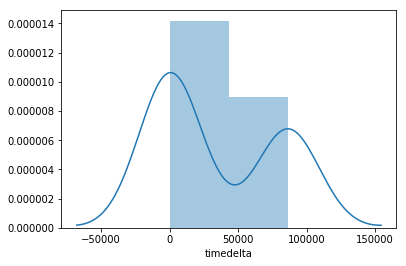

In [18]:
sns.distplot(second_bot['timedelta'].iloc[1:])

In [ ]:
This bot seems to very different than the first bot. The timedelta appears to much more random, but still with two 

In [19]:
third_bot.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.0,31.000000
mean,1.000000e-01,0.125000,42.218750,25.843750,16.468750,1.0,31113.967742
std,4.229954e-17,0.707107,1.263236,13.259469,9.329054,0.0,41718.470553
min,1.000000e-01,0.000000,37.000000,6.000000,1.000000,1.0,0.000000
25%,1.000000e-01,0.000000,42.000000,15.750000,8.750000,1.0,7.000000
50%,1.000000e-01,0.000000,42.000000,24.000000,16.500000,1.0,73.000000
75%,1.000000e-01,0.000000,42.000000,34.500000,24.250000,1.0,86330.500000
max,1.000000e-01,4.000000,45.000000,52.000000,31.000000,1.0,86398.000000


In [20]:
third_bot

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
1281005,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-01 00:42:13,0,42,13,1,1.0,NaN
2649987,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-02 00:42:16,0,42,16,2,1.0,3.0
2545082,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-03 00:42:22,0,42,22,3,1.0,6.0
4381707,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-04 00:42:40,0,42,40,4,1.0,18.0
3640573,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-05 00:42:25,0,42,25,5,1.0,86385.0
949087,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-06 00:42:32,0,42,32,6,1.0,7.0
5168,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-07 00:42:34,0,42,34,7,1.0,2.0
4071348,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 00:42:32,0,42,32,8,1.0,86398.0
3974001,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-09 00:42:15,0,42,15,9,1.0,86383.0
853854,eosio.token,nckj42dit5sb,0.1,EOS,endlessdicex,Endless Dice,2019-03-10 00:42:24,0,42,24,10,1.0,9.0


In [21]:
third_bot['timedelta'].value_counts()

7.0        4
0.0        2
86385.0    2
86223.0    1
86373.0    1
6.0        1
18.0       1
2.0        1
9.0        1
1.0        1
10.0       1
73.0       1
55.0       1
33.0       1
81.0       1
183.0      1
148.0      1
13986.0    1
86315.0    1
86384.0    1
86383.0    1
86341.0    1
86398.0    1
86390.0    1
86320.0    1
3.0        1
Name: timedelta, dtype: int64

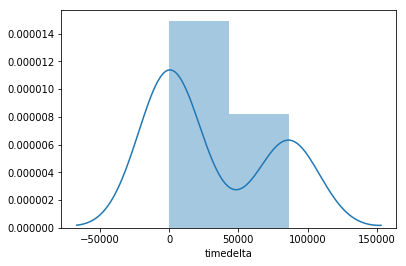

In [22]:
sns.distplot(third_bot['timedelta'].iloc[1:])

This account also appears to be pretty random in timedelta of transactions

## Non-labeled Accounts to Be Explored
g44dmnrxg4ge       5791
iyeoseos1eee       5453
leiniao12345       4887
asdfghjklz14       4799
wobuzhidaoya       4425
benzilimbenb       398

In [23]:
def getAccountTxns(name,data):
    hold_txns=data[data['d_from']==name]
    hold_txns['timedelta']=timedelta(hold_txns)
    return hold_txns
    

In [24]:

first_txns=getAccountTxns('g44dmnrxg4ge',clean_frame)
second_txns=getAccountTxns('iyeoseos1eee',clean_frame)
third_txns=getAccountTxns('leiniao12345',clean_frame)
fourth_txns=getAccountTxns('asdfghjklz14',clean_frame)
fifth_txns=getAccountTxns('wobuzhidaoya',clean_frame)
sixth_txns=getAccountTxns('benzilimbenb',clean_frame)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## First: g44dmnrxg4ge

In [25]:
first_txns.head()

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
1326043,eosio.token,g44dmnrxg4ge,0.4594,EOS,endlessdicex,Endless Dice,2019-03-01 11:35:16,11,35,16,1,NaN,NaN
1326060,eosio.token,g44dmnrxg4ge,0.4739,EOS,endlessdicex,Endless Dice,2019-03-01 11:35:35,11,35,35,1,NaN,19.0
1326083,eosio.token,g44dmnrxg4ge,0.4888,EOS,endlessdicex,Endless Dice,2019-03-01 11:35:57,11,35,57,1,NaN,22.0
1326096,eosio.token,g44dmnrxg4ge,0.5042,EOS,endlessdicex,Endless Dice,2019-03-01 11:36:10,11,36,10,1,NaN,13.0
1326115,eosio.token,g44dmnrxg4ge,0.5201,EOS,endlessdicex,Endless Dice,2019-03-01 11:36:26,11,36,26,1,NaN,16.0


In [26]:
first_txns.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,5791.000000,5791.000000,5791.000000,5791.000000,5791.000000,0.0,5790.000000
mean,18.770437,13.808151,29.933518,29.198584,17.658954,NaN,322.108463
std,181.016410,6.228353,16.678714,17.291365,8.552221,NaN,3515.624304
min,0.100000,0.000000,0.000000,0.000000,1.000000,NaN,4.000000
25%,0.252000,11.000000,16.000000,14.000000,9.000000,NaN,10.000000
50%,0.839000,15.000000,30.000000,29.000000,20.000000,NaN,17.000000
75%,2.000000,18.000000,44.000000,44.000000,24.000000,NaN,28.000000
max,6521.936400,23.000000,59.000000,59.000000,30.000000,NaN,79975.000000


In [27]:
first_txns['timedelta'].value_counts()

8.0        454
7.0        450
9.0        358
10.0       261
11.0       246
12.0       203
13.0       180
19.0       177
17.0       175
6.0        174
16.0       173
15.0       167
18.0       164
14.0       154
20.0       152
24.0       143
21.0       139
22.0       136
23.0       127
25.0       103
27.0        99
28.0        90
26.0        88
31.0        73
29.0        72
33.0        72
30.0        59
32.0        54
34.0        53
36.0        48
          ... 
207.0        1
1156.0       1
2063.0       1
311.0        1
4639.0       1
410.0        1
3733.0       1
146.0        1
1040.0       1
241.0        1
1658.0       1
11854.0      1
5887.0       1
283.0        1
1914.0       1
4114.0       1
221.0        1
501.0        1
193.0        1
64286.0      1
18060.0      1
20105.0      1
18310.0      1
34053.0      1
496.0        1
108.0        1
368.0        1
74242.0      1
1936.0       1
201.0        1
Name: timedelta, Length: 277, dtype: int64

In [28]:
first_txns.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,5791.000000,5791.000000,5791.000000,5791.000000,5791.000000,0.0,5790.000000
mean,18.770437,13.808151,29.933518,29.198584,17.658954,NaN,322.108463
std,181.016410,6.228353,16.678714,17.291365,8.552221,NaN,3515.624304
min,0.100000,0.000000,0.000000,0.000000,1.000000,NaN,4.000000
25%,0.252000,11.000000,16.000000,14.000000,9.000000,NaN,10.000000
50%,0.839000,15.000000,30.000000,29.000000,20.000000,NaN,17.000000
75%,2.000000,18.000000,44.000000,44.000000,24.000000,NaN,28.000000
max,6521.936400,23.000000,59.000000,59.000000,30.000000,NaN,79975.000000


In [29]:
first_txns['timedelta'].value_counts()

8.0        454
7.0        450
9.0        358
10.0       261
11.0       246
12.0       203
13.0       180
19.0       177
17.0       175
6.0        174
16.0       173
15.0       167
18.0       164
14.0       154
20.0       152
24.0       143
21.0       139
22.0       136
23.0       127
25.0       103
27.0        99
28.0        90
26.0        88
31.0        73
29.0        72
33.0        72
30.0        59
32.0        54
34.0        53
36.0        48
          ... 
207.0        1
1156.0       1
2063.0       1
311.0        1
4639.0       1
410.0        1
3733.0       1
146.0        1
1040.0       1
241.0        1
1658.0       1
11854.0      1
5887.0       1
283.0        1
1914.0       1
4114.0       1
221.0        1
501.0        1
193.0        1
64286.0      1
18060.0      1
20105.0      1
18310.0      1
34053.0      1
496.0        1
108.0        1
368.0        1
74242.0      1
1936.0       1
201.0        1
Name: timedelta, Length: 277, dtype: int64

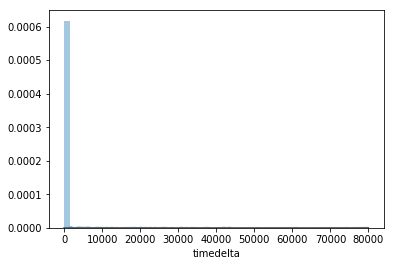

In [30]:
sns.distplot(first_txns['timedelta'].iloc[1:])

### Let's look at d_quantity

In [31]:
first_txns.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,5791.000000,5791.000000,5791.000000,5791.000000,5791.000000,0.0,5790.000000
mean,18.770437,13.808151,29.933518,29.198584,17.658954,NaN,322.108463
std,181.016410,6.228353,16.678714,17.291365,8.552221,NaN,3515.624304
min,0.100000,0.000000,0.000000,0.000000,1.000000,NaN,4.000000
25%,0.252000,11.000000,16.000000,14.000000,9.000000,NaN,10.000000
50%,0.839000,15.000000,30.000000,29.000000,20.000000,NaN,17.000000
75%,2.000000,18.000000,44.000000,44.000000,24.000000,NaN,28.000000
max,6521.936400,23.000000,59.000000,59.000000,30.000000,NaN,79975.000000


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1babe5e860>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

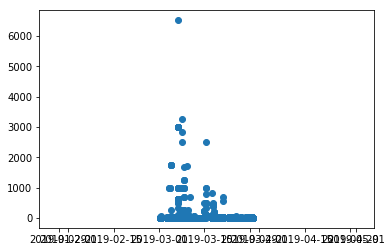

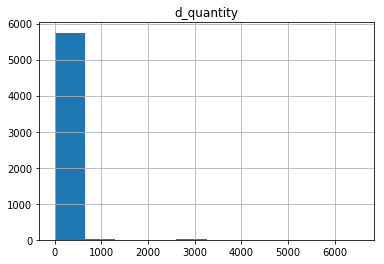

In [32]:
plt.figure(figsize=(20,20))
plt.subplots(0,2)
plt.scatter(first_txns['trx_timestamp'],first_txns['d_quantity'])
first_txns.hist(column="d_quantity",bins=10)

### Lets look at txns greater than 500 d_quantity

In [33]:
first_txns[first_txns['d_quantity']>500]

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
4409692,endlesstoken,g44dmnrxg4ge,1000.0000,ET,endlessdicex,Endless Dice,2019-03-04 05:51:26,5,51,26,4,NaN,31048.0
4409724,endlesstoken,g44dmnrxg4ge,1000.0000,ET,endlessdicex,Endless Dice,2019-03-04 05:51:42,5,51,42,4,NaN,16.0
4437884,endlesstoken,g44dmnrxg4ge,1000.0000,ET,endlessdicex,Endless Dice,2019-03-04 11:39:24,11,39,24,4,NaN,18926.0
4441293,endlesstoken,g44dmnrxg4ge,1000.0000,ET,endlessdicex,Endless Dice,2019-03-04 12:27:35,12,27,35,4,NaN,40.0
4441303,endlesstoken,g44dmnrxg4ge,1000.0000,ET,endlessdicex,Endless Dice,2019-03-04 12:27:44,12,27,44,4,NaN,9.0
4453412,endlesstoken,g44dmnrxg4ge,1741.0000,ET,endlessdicex,Endless Dice,2019-03-04 15:53:30,15,53,30,4,NaN,6851.0
4453432,endlesstoken,g44dmnrxg4ge,1741.0000,ET,endlessdicex,Endless Dice,2019-03-04 15:53:48,15,53,48,4,NaN,18.0
4453460,endlesstoken,g44dmnrxg4ge,1741.0000,ET,endlessdicex,Endless Dice,2019-03-04 15:54:21,15,54,21,4,NaN,33.0
4453480,endlesstoken,g44dmnrxg4ge,1741.0000,ET,endlessdicex,Endless Dice,2019-03-04 15:54:35,15,54,35,4,NaN,14.0
4453500,endlesstoken,g44dmnrxg4ge,1741.0000,ET,endlessdicex,Endless Dice,2019-03-04 15:54:57,15,54,57,4,NaN,22.0


 Is it strange to have consecutive txns with the same arbitrary d_quantity?
If not then this seems to be a human
If yes, this is most likely a bot

This account also has a high variability with minutes and hours of the day, which was typically not seen amongst the labeled bot accounts above

Probably human?!?!?!

### Second accout

In [34]:
second_txns.head()

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
2033830,eosio.token,iyeoseos1eee,0.1,EOS,endlessdicex,Endless Dice,2019-03-23 15:08:20,15,8,20,23,NaN,NaN
2034783,eosio.token,iyeoseos1eee,0.1,EOS,endlessdicex,Endless Dice,2019-03-23 15:19:33,15,19,33,23,NaN,673.0
2034790,eosio.token,iyeoseos1eee,0.1,EOS,endlessdicex,Endless Dice,2019-03-23 15:19:36,15,19,36,23,NaN,3.0
2034802,eosio.token,iyeoseos1eee,0.1,EOS,endlessdicex,Endless Dice,2019-03-23 15:19:40,15,19,40,23,NaN,4.0
2034811,eosio.token,iyeoseos1eee,0.1,EOS,endlessdicex,Endless Dice,2019-03-23 15:19:43,15,19,43,23,NaN,3.0


In [35]:
second_txns.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,5453.000000,5453.000000,5453.000000,5453.000000,5453.000000,0.0,5452.000000
mean,0.413471,13.286264,30.952320,29.316340,24.395012,NaN,103.676266
std,0.428637,5.628903,16.966983,17.410748,1.643209,NaN,2275.095259
min,0.100000,1.000000,0.000000,0.000000,23.000000,NaN,0.000000
25%,0.100000,5.000000,17.000000,14.000000,23.000000,NaN,3.000000
50%,0.100000,16.000000,30.000000,29.000000,23.000000,NaN,3.000000
75%,1.000000,17.000000,46.000000,44.000000,26.000000,NaN,4.000000
max,1.000000,23.000000,59.000000,59.000000,31.000000,NaN,86193.000000


In [36]:
second_txns['timedelta'].value_counts()

3.0        1854
4.0        1740
2.0        1128
5.0         229
7.0          77
6.0          70
8.0          52
9.0          41
10.0         25
12.0         21
11.0         14
17.0         13
13.0         10
18.0          9
14.0          9
15.0          9
1.0           7
37.0          7
16.0          6
23.0          5
20.0          5
42.0          4
28.0          4
25.0          4
0.0           4
19.0          4
21.0          3
91.0          3
29.0          3
24.0          3
           ... 
41.0          1
3322.0        1
133.0         1
199.0         1
543.0         1
186.0         1
43464.0       1
3710.0        1
69.0          1
258.0         1
46.0          1
38.0          1
53.0          1
17755.0       1
15279.0       1
515.0         1
6368.0        1
127.0         1
2669.0        1
40664.0       1
223.0         1
21631.0       1
788.0         1
67.0          1
114.0         1
68.0          1
108.0         1
62.0          1
34.0          1
247.0         1
Name: timedelta, Length:

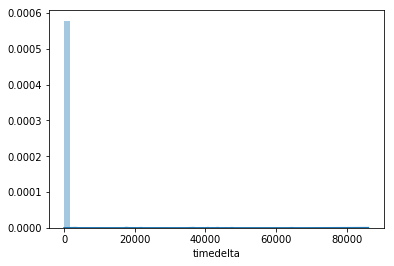

In [37]:
sns.distplot(second_txns['timedelta'].iloc[1:])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ba99c2780>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

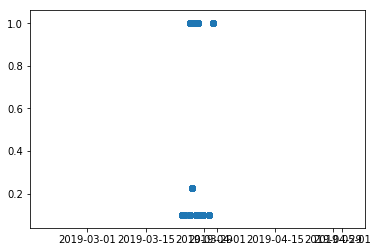

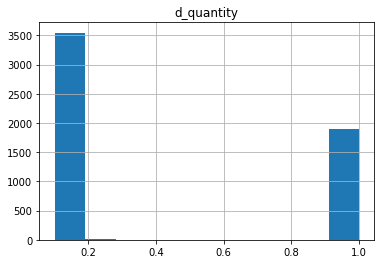

In [38]:
plt.figure(figsize=(20,20))
plt.subplots(0,2)
plt.scatter(second_txns['trx_timestamp'],second_txns['d_quantity'])
second_txns.hist(column="d_quantity",bins=10)

High likelihood of bot based on d_app quantity because its almost always 0.1 but minutes and hours have relatively higher variability.

### Third Account

In [39]:
third_txns

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
1215315,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:40:48,19,40,48,21,NaN,NaN
1215328,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:41:16,19,41,16,21,NaN,28.0
1215343,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:41:27,19,41,27,21,NaN,11.0
1215395,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:43:03,19,43,3,21,NaN,96.0
1215423,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:43:24,19,43,24,21,NaN,21.0
1215443,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:43:37,19,43,37,21,NaN,13.0
1215452,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:43:47,19,43,47,21,NaN,10.0
1215465,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:43:56,19,43,56,21,NaN,9.0
1215479,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:44:04,19,44,4,21,NaN,8.0
1215495,eosio.token,leiniao12345,0.1000,EOS,endlessdicex,Endless Dice,2019-03-21 19:44:15,19,44,15,21,NaN,11.0


In [40]:
third_txns.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,0.0,4886.000000
mean,0.205157,10.371393,29.399836,29.205852,22.455903,NaN,81.971347
std,2.064152,7.227502,17.557815,17.346254,1.273670,NaN,1838.849904
min,0.100000,2.000000,0.000000,0.000000,21.000000,NaN,2.000000
25%,0.100000,4.000000,14.000000,14.000000,22.000000,NaN,6.000000
50%,0.100000,7.000000,30.000000,29.000000,22.000000,NaN,8.000000
75%,0.100000,20.000000,45.000000,44.000000,23.000000,NaN,9.000000
max,100.000000,23.000000,59.000000,59.000000,28.000000,NaN,73547.000000


In [41]:
third_txns['timedelta'].value_counts()

7.0        764
8.0        758
6.0        640
9.0        571
5.0        444
10.0       394
4.0        375
11.0       234
3.0        182
12.0       140
13.0        93
14.0        54
15.0        34
16.0        28
17.0        20
18.0        12
2.0         11
20.0         9
19.0         6
21.0         6
25.0         6
24.0         5
29.0         5
23.0         5
27.0         4
31.0         3
22.0         3
69.0         2
53.0         2
39.0         2
          ... 
302.0        1
73547.0      1
5110.0       1
1166.0       1
186.0        1
924.0        1
678.0        1
178.0        1
177.0        1
1273.0       1
41.0         1
59070.0      1
183.0        1
65.0         1
846.0        1
159.0        1
9401.0       1
2211.0       1
187.0        1
73.0         1
425.0        1
264.0        1
46.0         1
54.0         1
58.0         1
168.0        1
368.0        1
62.0         1
56070.0      1
293.0        1
Name: timedelta, Length: 101, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b78974d68>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

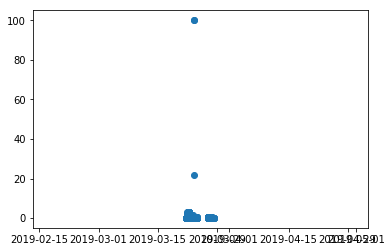

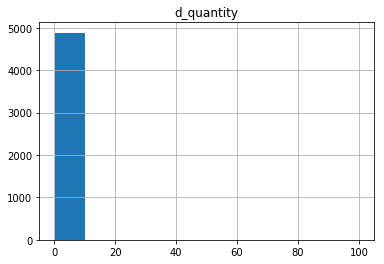

In [42]:
plt.figure(figsize=(20,20))
plt.subplots(0,2)
plt.scatter(third_txns['trx_timestamp'],third_txns['d_quantity'])
third_txns.hist(column="d_quantity",bins=10)

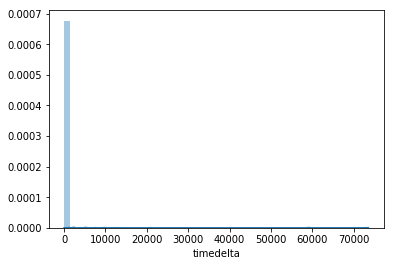

In [43]:
sns.distplot(third_txns['timedelta'].iloc[1:])

Bot based on most d_quantity being 0.1 and distribution of timedelta

### Fourth 

In [44]:
fourth_txns

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
1662928,eosio.token,asdfghjklz14,1.0000,EOS,endlessdicex,Endless Dice,2019-03-16 11:33:47,11,33,47,16,NaN,NaN
1662975,eosio.token,asdfghjklz14,1.0000,EOS,endlessdicex,Endless Dice,2019-03-16 11:34:21,11,34,21,16,NaN,34.0
1663068,eosio.token,asdfghjklz14,1.0000,EOS,endlessdicex,Endless Dice,2019-03-16 11:35:23,11,35,23,16,NaN,62.0
1663183,eosio.token,asdfghjklz14,5.0000,EOS,endlessdicex,Endless Dice,2019-03-16 11:36:55,11,36,55,16,NaN,92.0
1663244,eosio.token,asdfghjklz14,0.1000,EOS,endlessdicex,Endless Dice,2019-03-16 11:38:00,11,38,0,16,NaN,65.0
1663267,eosio.token,asdfghjklz14,0.1000,EOS,endlessdicex,Endless Dice,2019-03-16 11:38:25,11,38,25,16,NaN,25.0
1663291,eosio.token,asdfghjklz14,0.1000,EOS,endlessdicex,Endless Dice,2019-03-16 11:38:44,11,38,44,16,NaN,19.0
1663304,eosio.token,asdfghjklz14,0.1000,EOS,endlessdicex,Endless Dice,2019-03-16 11:38:59,11,38,59,16,NaN,15.0
1663328,eosio.token,asdfghjklz14,0.1000,EOS,endlessdicex,Endless Dice,2019-03-16 11:39:22,11,39,22,16,NaN,23.0
1663355,eosio.token,asdfghjklz14,0.1000,EOS,endlessdicex,Endless Dice,2019-03-16 11:39:43,11,39,43,16,NaN,21.0


In [45]:
fourth_txns.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,0.0,4798.000000
mean,0.251269,9.410502,30.298187,29.740779,19.379246,NaN,131.706753
std,0.968303,3.085529,17.474344,17.366255,0.791231,NaN,2594.975189
min,0.100000,1.000000,0.000000,0.000000,16.000000,NaN,0.000000
25%,0.200000,7.000000,15.000000,14.000000,19.000000,NaN,10.000000
50%,0.200000,9.000000,30.000000,30.000000,20.000000,NaN,12.000000
75%,0.200000,12.000000,46.000000,45.000000,20.000000,NaN,15.000000
max,50.000000,19.000000,59.000000,59.000000,24.000000,NaN,84511.000000


In [46]:
fourth_txns['timedelta'].value_counts()

14.0       526
10.0       476
11.0       467
15.0       431
12.0       310
13.0       303
16.0       301
9.0        204
17.0       187
7.0        160
6.0        152
8.0        144
4.0        115
5.0        106
3.0         96
1.0         95
2.0         84
18.0        82
19.0        62
20.0        55
0.0         37
23.0        32
21.0        30
22.0        24
25.0        20
26.0        19
24.0        18
29.0        17
31.0        14
30.0        11
          ... 
73.0         1
69559.0      1
84511.0      1
116.0        1
124.0        1
328.0        1
2240.0       1
132.0        1
121.0        1
55.0         1
82.0         1
78.0         1
114.0        1
86.0         1
199.0        1
1605.0       1
205.0        1
2456.0       1
350.0        1
81.0         1
95.0         1
6364.0       1
159.0        1
175.0        1
79.0         1
84.0         1
66.0         1
180.0        1
200.0        1
424.0        1
Name: timedelta, Length: 137, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b878567b8>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

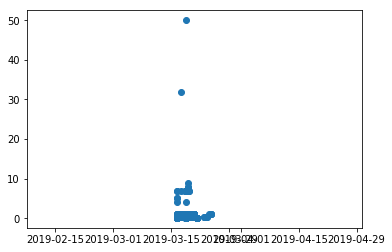

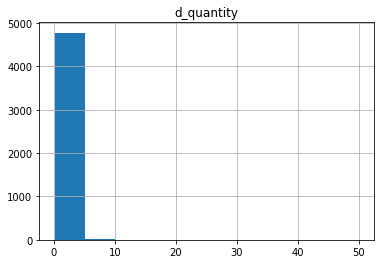

In [47]:
plt.figure(figsize=(20,20))
plt.subplots(0,2)
plt.scatter(fourth_txns['trx_timestamp'],fourth_txns['d_quantity'])
fourth_txns.hist(column="d_quantity",bins=10)

bot based on distribution of d_quantity and 

### Fifth Account

In [48]:
fifth_txns

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
4114677,eosio.token,wobuzhidaoya,1.0000,EOS,endlessdicex,Endless Dice,2019-03-08 11:32:59,11,32,59,8,NaN,NaN
4114705,eosio.token,wobuzhidaoya,2.0000,EOS,endlessdicex,Endless Dice,2019-03-08 11:33:28,11,33,28,8,NaN,29.0
4114728,eosio.token,wobuzhidaoya,0.6184,EOS,endlessdicex,Endless Dice,2019-03-08 11:33:54,11,33,54,8,NaN,26.0
4114741,eosio.token,wobuzhidaoya,1.2368,EOS,endlessdicex,Endless Dice,2019-03-08 11:34:04,11,34,4,8,NaN,10.0
4114757,eosio.token,wobuzhidaoya,1.2368,EOS,endlessdicex,Endless Dice,2019-03-08 11:34:18,11,34,18,8,NaN,14.0
4114768,eosio.token,wobuzhidaoya,2.4736,EOS,endlessdicex,Endless Dice,2019-03-08 11:34:26,11,34,26,8,NaN,8.0
4114777,eosio.token,wobuzhidaoya,4.9472,EOS,endlessdicex,Endless Dice,2019-03-08 11:34:34,11,34,34,8,NaN,8.0
4114801,eosio.token,wobuzhidaoya,1.2368,EOS,endlessdicex,Endless Dice,2019-03-08 11:34:53,11,34,53,8,NaN,19.0
4114813,eosio.token,wobuzhidaoya,1.2368,EOS,endlessdicex,Endless Dice,2019-03-08 11:35:04,11,35,4,8,NaN,11.0
4114824,eosio.token,wobuzhidaoya,1.2368,EOS,endlessdicex,Endless Dice,2019-03-08 11:35:13,11,35,13,8,NaN,9.0


In [49]:
fifth_txns.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,0.0,4424.000000
mean,0.515507,13.557062,29.498079,29.419209,9.625763,NaN,160.994123
std,1.768916,5.079829,16.729865,17.281910,1.835102,NaN,2710.464826
min,0.001000,1.000000,0.000000,0.000000,8.000000,NaN,0.000000
25%,0.100000,13.000000,15.000000,14.000000,8.000000,NaN,5.000000
50%,0.200000,14.000000,28.000000,30.000000,9.000000,NaN,7.000000
75%,0.200000,17.000000,44.000000,44.000000,11.000000,NaN,9.000000
max,51.200000,22.000000,59.000000,59.000000,29.000000,NaN,79608.000000


In [50]:
fifth_txns['timedelta'].value_counts()

6.0        762
7.0        738
8.0        627
5.0        620
4.0        437
9.0        384
10.0       221
11.0       118
12.0        80
3.0         66
13.0        65
14.0        29
16.0        24
15.0        23
17.0        12
18.0         9
19.0         8
24.0         7
23.0         6
2.0          5
26.0         5
21.0         4
35.0         4
22.0         4
20.0         4
42.0         3
33.0         3
60.0         3
29.0         3
34.0         3
          ... 
115.0        1
90.0         1
137.0        1
12223.0      1
1756.0       1
161.0        1
11834.0      1
53730.0      1
1143.0       1
579.0        1
522.0        1
93.0         1
59.0         1
108.0        1
55.0         1
84.0         1
58.0         1
76.0         1
54.0         1
31.0         1
68.0         1
21132.0      1
644.0        1
19351.0      1
3571.0       1
315.0        1
11983.0      1
789.0        1
77.0         1
446.0        1
Name: timedelta, Length: 156, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b8749c390>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

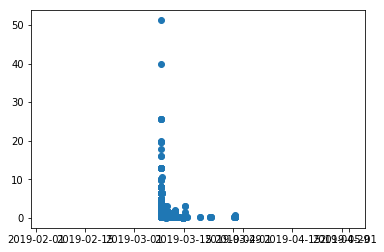

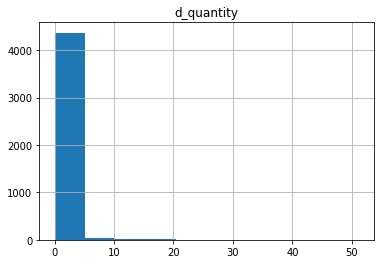

In [51]:
plt.figure(figsize=(20,20))
plt.subplots(0,2)
plt.scatter(fifth_txns['trx_timestamp'],fifth_txns['d_quantity'])
fifth_txns.hist(column="d_quantity",bins=10)

maybe more of a human based on d_quantity distribution?

### Sixth Account

In [52]:
sixth_txns

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,timedelta
4116452,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:04:35,12,4,35,8,NaN,NaN
4116458,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:04:39,12,4,39,8,NaN,4.0
4116468,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:04:43,12,4,43,8,NaN,4.0
4116469,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:04:45,12,4,45,8,NaN,2.0
4116484,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:04:50,12,4,50,8,NaN,5.0
4116488,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:04:52,12,4,52,8,NaN,2.0
4116489,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:04:54,12,4,54,8,NaN,2.0
4116498,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:04:56,12,4,56,8,NaN,2.0
4116508,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:05:00,12,5,0,8,NaN,4.0
4116512,eosio.token,benzilimbenb,0.1,EOS,endlessdicex,Endless Dice,2019-03-08 12:05:02,12,5,2,8,NaN,2.0


In [53]:
sixth_txns.describe()

,d_quantity,hours,minutes,seconds,day,bot_label,timedelta
count,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,0.0,3980.000000
mean,10.953694,13.160010,30.191158,29.446873,16.681236,NaN,264.040452
std,9.530137,4.935236,16.581287,17.276644,6.425970,NaN,3575.627146
min,0.100000,1.000000,0.000000,0.000000,8.000000,NaN,0.000000
25%,0.100000,12.000000,18.000000,14.000000,11.000000,NaN,3.000000
50%,10.000000,12.000000,29.000000,30.000000,17.000000,NaN,6.000000
75%,20.000000,18.000000,44.000000,44.000000,21.000000,NaN,13.000000
max,100.000000,21.000000,59.000000,59.000000,30.000000,NaN,80872.000000


In [54]:
sixth_txns['timedelta'].value_counts()

2.0        696
3.0        692
4.0        241
9.0        188
10.0       177
5.0        165
8.0        159
6.0        156
14.0       133
11.0       127
7.0        117
16.0       116
15.0       109
13.0        99
12.0        92
17.0        78
1.0         76
18.0        56
19.0        53
20.0        51
21.0        35
22.0        33
24.0        28
23.0        23
0.0         19
27.0        18
25.0        17
28.0        17
26.0        14
29.0         9
          ... 
61303.0      1
103.0        1
9491.0       1
74905.0      1
493.0        1
25514.0      1
48118.0      1
326.0        1
447.0        1
39527.0      1
27831.0      1
3175.0       1
303.0        1
3897.0       1
11998.0      1
504.0        1
65791.0      1
1324.0       1
63.0         1
89.0         1
412.0        1
90.0         1
102.0        1
158.0        1
51.0         1
53.0         1
114.0        1
624.0        1
344.0        1
46167.0      1
Name: timedelta, Length: 145, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b87254198>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

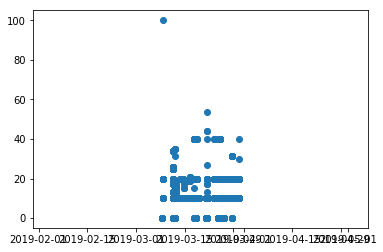

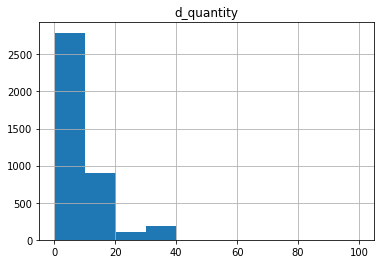

In [55]:
plt.figure(figsize=(20,20))
plt.subplots(0,2)
plt.scatter(sixth_txns['trx_timestamp'],sixth_txns['d_quantity'])
sixth_txns.hist(column="d_quantity",bins=10)

# AutoCorrelation

Let's explore the autocorrleation of the count of transactions by hour, since the above exploration doesnt seem to be describing a bots activity to well.

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress
import statsmodels.api as sm

Need to find a way to make the index periods of time by hour for our timeline

In [82]:
def timeseries_agg(data):
    '''
    Outputs a pandas DF that tells you the count_txns per hour
    @params:
    data is the raw txns of a specific account
    
    
    '''
    hour_index=pd.date_range(start="3/1/2019", end="4/1/2019", freq="H")
    timeseries_dummy = pd.DataFrame(0, index=hour_index, columns=['count_txns', 'volume_eos'])
    timeseries_dummy=timeseries_dummy.astype(float)
    for index, row in data.iterrows(): 
        time=row['trx_timestamp'].replace(microsecond=0, second=0, minute=0)
        timeseries_dummy.loc[time]['count_txns']=1+timeseries_dummy.loc[time]['count_txns']
        timeseries_dummy.loc[time]['volume_eos']=row['d_quantity']+ timeseries_dummy.loc[time]['volume_eos']
    return timeseries_dummy
    

In [83]:
timeseries_agg(first_bot)

,count_txns,volume_eos
2019-03-01 00:00:00,1.0,0.1
2019-03-01 01:00:00,0.0,0.0
2019-03-01 02:00:00,0.0,0.0
2019-03-01 03:00:00,0.0,0.0
2019-03-01 04:00:00,0.0,0.0
2019-03-01 05:00:00,0.0,0.0
2019-03-01 06:00:00,0.0,0.0
2019-03-01 07:00:00,0.0,0.0
2019-03-01 08:00:00,0.0,0.0
2019-03-01 09:00:00,0.0,0.0


In order to do autocorrelation, we should have at least 4 observations or 1 week of lagging. So 168 hours is the lag period input into the function below. It will plot a range of lag periods from 1-168.

In [84]:
def plot_autocorr_counttxns(data,lagnum):
    plt.subplots(3,0)
    title_name=data['d_from'].iloc[0]
    data=timeseries_agg(data)
    sm.graphics.tsa.plot_acf(data['count_txns'], lags=lagnum)
    plt.title(title_name)
    plt.show()

<Figure size 432x288 with 0 Axes>

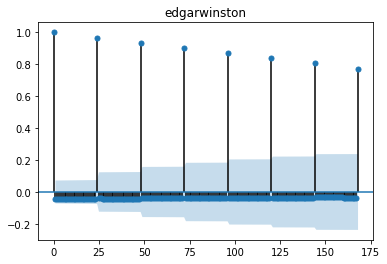

In [85]:
plot_autocorr_counttxns(first_bot,168)

Ahh intersting it seems we have captured the daily transaction nature of this bot!

Let's write a function however to get the maxAutoCorrelation except for the lag period of 0 (we dont want it to calculate/return the lag period with itself)

In [87]:
def maxAutoCorrelation(data,user):
    hold=0
    l=0
    data=timeseries_agg(data[data['d_from']==user])
    for i in range(1,168):
        check=data['count_txns'].autocorr(lag=i)
        if (check > hold):
            hold=check
            l=i
    print(l)
    return hold

In [88]:
maxAutoCorrelation(first_bot,'edgarwinston')

24


0.9830266734134714

Nice, we were able to capture the fact that edgarwinston makes almost the same number of transactions every 24 hours. Lets try on the other bots!

<Figure size 432x288 with 0 Axes>

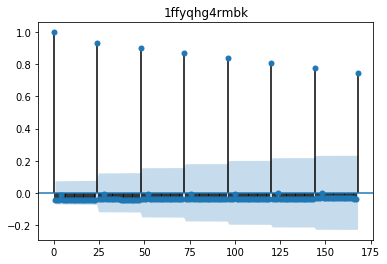

In [89]:
plot_autocorr_counttxns(second_bot,168)

<Figure size 432x288 with 0 Axes>

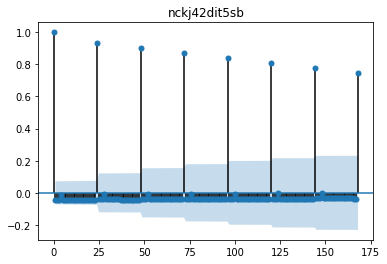

In [90]:
plot_autocorr_counttxns(third_bot,168)

#### This feature seems to be able to identify some of these simples bots very well

<Figure size 432x288 with 0 Axes>

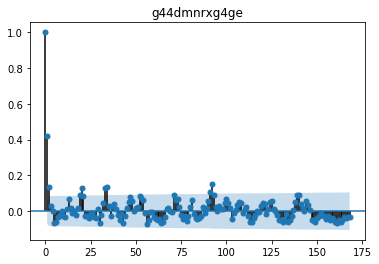

In [91]:
plot_autocorr_counttxns(first_txns,168)

<Figure size 432x288 with 0 Axes>

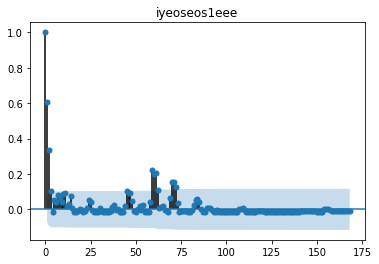

In [92]:
plot_autocorr_counttxns(second_txns,168)

<Figure size 432x288 with 0 Axes>

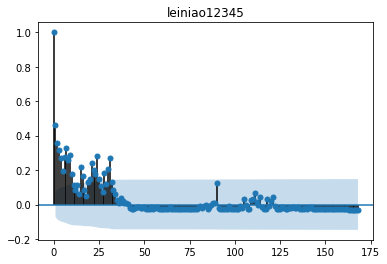

In [93]:
plot_autocorr_counttxns(third_txns,168)

<Figure size 432x288 with 0 Axes>

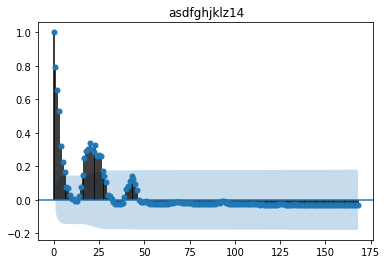

In [94]:
plot_autocorr_counttxns(fourth_txns,168)

<Figure size 432x288 with 0 Axes>

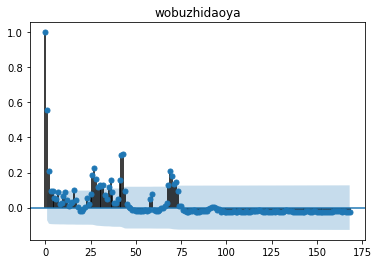

In [95]:
plot_autocorr_counttxns(fifth_txns,168)

In [96]:
clean_frame['d_from'].value_counts()

endlessdicex    3048248
endlessbank1     776259
nmslnmslnmsl     254893
eossuperplay     202279
endlesscrash     175291
bimawen11111      17832
thegrintsch1      14983
kaidenmatias      14179
g4ztemjugyge      12963
everettlayne      12767
andrewcortez      12459
ticklish2424      11152
skdi12312311       9662
danieldamari       9164
adawalletwin       8151
stardlullaby       7464
xuminggangok       7450
twinswallet1       6344
g44temrwgage       5922
g44dmnrxg4ge       5791
iyeoseos1eee       5453
leiniao12345       4887
asdfghjklz14       4799
wobuzhidaoya       4425
benzilimbenb       3981
gy3tamrxgqge       3838
zahuhuo1o1o2       3635
xulingbookok       3463
gyydinbrgige       3247
ge4tinrzhage       2975
                 ...   
bigbangspace          1
suixingerwei          1
shurshuev555          1
beniiiiiiiii          1
zengxiangye1          1
54321alibaba          1
theomnicient          1
jjjxxxccc123          1
joycceeeeeee          1
helaclhch224          1
phoenixhedge    

Lets use this plotting tool on some accounts with txn counts between 200-50 (which may have higher human percentages due to low txn count)

In [97]:
user_counts = clean_frame['d_from'].value_counts().rename('user_counts')

zip_data_df = clean_frame.merge(user_counts.to_frame(),
                                left_on='d_from',
                                right_index=True)

In [98]:
zip_data_df[(zip_data_df['user_counts']>50) & (zip_data_df['user_counts']<200)]['d_from'].unique()

array(['weitian12345', 'g42tgmbshege', 'twittering41', 'zadingxlaixl',
       'amiaoeos1234', 'guma3debacue', 'edefrancq124', 'ilpasssatore',
       'gy3dgmrzhage', 'gqydgmrrg4ge', 'gu4donzwguge', 'helloworldzc',
       'marlon123451', 'guztanbtgige', 'gy4tinjrgene', 'sangtae12lee',
       'marekvrba555', 'fanddan12345', 'jixianglanzh', 'eoslover1314',
       'gizdambvgmge', 'bidreamur1vx', 'betdice.e', 'snegskyppyam',
       'zjx222222222', 'zhangguohua1', 'anewbegining', 'yazhououzhou',
       'vip123.e', 'yanhai555555', 'g42doojxgege', 'bidreammxr23',
       'ggggggggggio', 'zengpaul1234', 'luizmarciano', 'luckylukeeos',
       'kimsangwook1', 'youjin112233', 'heytinzxgage', 'eosssjjlove5',
       'zhougong1234', 'cuizong11111', 'praabc123abc', 'eosbmshabile',
       'bidreamoi11n', 'ge3tkmrzgyge', 'wangyuanzhen', 'cdlyxfkl5555',
       'caishenyeeos', 'eosbettingyo', 'ha2tqmjsgqge', 'tmvlsem12345',
       'guzdkobqhage', 'motoboy12345', 'openwondfunq', 'zengmiao1314',
       'yansh

<Figure size 432x288 with 0 Axes>

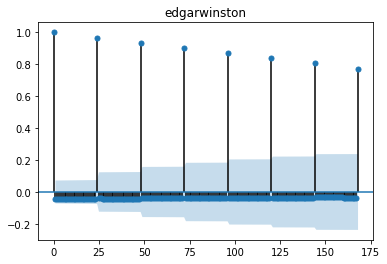

In [99]:
plot_autocorr_counttxns(first_bot,168)

In [100]:
clean_frame['d_from'].unique()

array(['endlessdicex', 'endlessbank1', 'justiceariel', ...,
       'tangyongzhen', 'eosvipuser12', 'wrnmwrnmwrnm'], dtype=object)

In [102]:
maxAutoCorrelation(clean_frame,'ilpasssatore')

24


0.451200987726496

In [103]:
maxAutoCorrelation(clean_frame,'anewbegining')

13


0.4597796223580961

In [104]:
list_of_accounts_200_to_50_count=zip_data_df[(zip_data_df['user_counts']>50) & (zip_data_df['user_counts']<200)]

In [105]:
list_of_accounts_200_to_50_count

,account,d_from,d_quantity,d_quantity_unit,d_to,dapp_code,trx_timestamp,hours,minutes,seconds,day,bot_label,user_counts
1282023,eosio.token,weitian12345,0.10,EOS,endlessdicex,Endless Dice,2019-03-01 00:49:27,0,49,27,1,NaN,80
1282055,eosio.token,weitian12345,0.10,EOS,endlessdicex,Endless Dice,2019-03-01 00:49:37,0,49,37,1,NaN,80
1282160,eosio.token,weitian12345,0.10,EOS,endlessdicex,Endless Dice,2019-03-01 00:50:21,0,50,21,1,NaN,80
1304636,eosio.token,weitian12345,0.10,EOS,endlessdicex,Endless Dice,2019-03-01 05:43:44,5,43,44,1,NaN,80
1304668,eosio.token,weitian12345,0.10,EOS,endlessdicex,Endless Dice,2019-03-01 05:44:04,5,44,4,1,NaN,80
1304703,eosio.token,weitian12345,0.10,EOS,endlessdicex,Endless Dice,2019-03-01 05:44:31,5,44,31,1,NaN,80
1304715,eosio.token,weitian12345,0.10,EOS,endlessdicex,Endless Dice,2019-03-01 05:44:37,5,44,37,1,NaN,80
1313508,eosio.token,weitian12345,0.20,EOS,endlessdicex,Endless Dice,2019-03-01 07:48:48,7,48,48,1,NaN,80
1313527,eosio.token,weitian12345,0.20,EOS,endlessdicex,Endless Dice,2019-03-01 07:49:08,7,49,8,1,NaN,80
1313595,eosio.token,weitian12345,0.20,EOS,endlessdicex,Endless Dice,2019-03-01 07:50:09,7,50,9,1,NaN,80


In [111]:
def selectDataFromUser(data,user):
    return data[data['d_from']==user]

<Figure size 432x288 with 0 Axes>

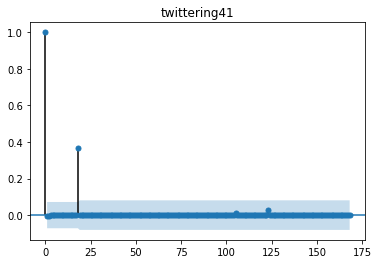

In [112]:
plot_autocorr_counttxns(selectDataFromUser(clean_frame,'twittering41'),168)

In [113]:
maxAutoCorrelation(clean_frame,'twittering41')

18


0.9096674909200057

<Figure size 432x288 with 0 Axes>

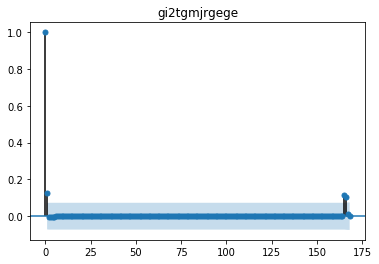

In [114]:
plot_autocorr_counttxns(selectDataFromUser(clean_frame,'gi2tgmjrgege'),168)

In [115]:
maxAutoCorrelation(clean_frame,'gi2tgmjrgege')

165


0.7659218471883584

<Figure size 432x288 with 0 Axes>

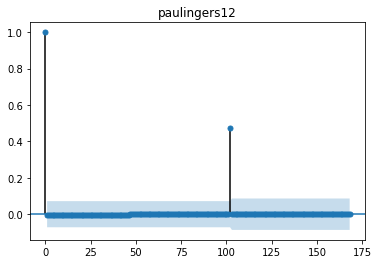

In [116]:
plot_autocorr_counttxns(selectDataFromUser(clean_frame,'paulingers12'),168)

In [117]:
maxAutoCorrelation(clean_frame,'paulingers12')

102


0.8155202200224356

**MaxAutoCorrelation seems to be a very useful feature for our ml model and gave us a good understanding of the temporal nature of our timeseries txn data**